Método de fuerza bruta para una función de una variable y dos variables
0.001

Función: 4*x**4 - 2*x**2 + x
Búsqueda ingenua
Rango de búsqueda: [-10000,10000]
Tiempo de ejecución: 278.83631467819214
Punto máximo: [ 10000.00000007276 , 3.99999998011742e+16 ]
Punto mínimo: [ -0.5999999636223947 , -0.801600002037137 ]
Tiempo de ejecución: 278.84383273124695 s

Método de Newton
Solución: -0.5957439419777424
La raíz [ -0.5957439419777424 ] de la derivada es un mínimo
El punto mínimo de la función se encuentra en ( -0.5957439419777424 , -0.801718800884190 )
Tiempo de ejecución: 0.11292672157287598 s


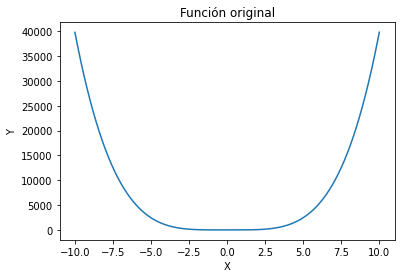

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
import sympy
import time
from sympy import *

class Optimization():
  def minmax(self,func):
    X=np.arange(-10000,10000.1,0.1)
    print("Rango de búsqueda: [-10000,10000]")
    maximo=func.subs(x,X[0])
    minimo=func.subs(x,X[0])
    indexMax=X[0]
    indexMin=X[0]

    start=time.time()
    for i in range(0,len(X)):
      if func.subs(x,X[i])>maximo:
        maximo=func.subs(x,X[i])
        indexMax=X[i]
      if func.subs(x,X[i])<minimo:
        minimo=func.subs(x,X[i])
        indexMin=X[i]
    end=time.time()
    print("Tiempo de ejecución:",end-start)

    return indexMax,maximo,indexMin,minimo

  def checkRoot(self,f,fp,raiz):
    #Criterio de la primer derivada
    if (fp.subs(x,raiz-0.1)>0 and fp.subs(x,raiz+0.1)<0): 
      print("La raíz [",raiz,"] de la derivada es un máximo")
      print("El punto máximo de la función se encuentra en (",raiz,",",f.subs(x,raiz),")")
    elif (fp.subs(x,raiz-0.1)<0 and fp.subs(x,raiz+0.1)>0):
      print("La raíz [",raiz,"] de la derivada es un mínimo")
      print("El punto mínimo de la función se encuentra en (",raiz,",",f.subs(x,raiz),")")

class NumericalMethods():
  def newton(self,x2,f,tol,maxIter):
    print("Método de Newton")
    fp = diff(f,x)
    iteracion=1
    eAbsolute=np.inf
 
    while (eAbsolute>=tol or iteracion==maxIter):
      x1=x2
      if (fp.subs(x,x1)==0):
        print("Error matemático")
        break
      x2=float(x1-(f.subs(x,x1)/fp.subs(x,x1)))
      eAbsolute=abs(x2-x1)
      iteracion+=1
 
    if (iteracion>maxIter):
      print("No converge a ninguna solución")
    else:
      print("Solución:",x2)
      return x2

class Graph():
  def plotLine(self,func,a,b):
    X=np.arange(a,b+0.1,0.1)
    Y=np.zeros_like(X)

    for i in range(len(X)):
      Y[i]=func.subs(x,X[i])

    plt.plot(X,Y)

def main():
  f=4*x**4-2*x**2+x
  print("Función:",f)
  # Graficación
  graph=Graph()
  graph.plotLine(f,-10,10)
  plt.title("Función original")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.savefig("FuncionOrginal.png",dpi=400)

  # Búsqueda ingenua
  print("Búsqueda ingenua")
  objO=Optimization()
  start=time.time()
  iMax,Max,iMin,Min=objO.minmax(f)
  print("Punto máximo: [",iMax,",",Max,"]")
  print("Punto mínimo: [",iMin,",",Min,"]")
  end=time.time()
  print("Tiempo de ejecución:",end-start,"s")

  # Método Newton
  print("")
  objN=NumericalMethods()
  start=time.time()
  fp=diff(f,x)
  root=objN.newton(10000,fp,0.0001,1000000)
  objO.checkRoot(f,fp,root)
  end=time.time()
  print("Tiempo de ejecución:",end-start,"s")

if __name__=="__main__":
  main()

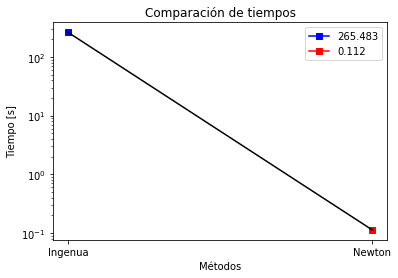

In [18]:
import matplotlib.pyplot as plt

times=[265.48340368270874,0.11233973503112793]
names=["Ingenua","Newton"]

plt.plot(names[0],times[0],color="blue",marker="s")
plt.plot(names[1],times[1],color="red",marker="s")
plt.plot(names,times,color="black")
plt.yscale("log")
plt.xlabel("Métodos")
plt.ylabel("Tiempo [s]")
plt.title("Comparación de tiempos")
plt.legend(["265.483","0.112"])
plt.savefig("ComparacionTiempos.png",dpi=400)